In [1]:
# !pip install tensorflow
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [1]:
import spartan as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from sklearn.metrics import f1_score,precision_score, recall_score, accuracy_score, precision_recall_curve,auc
#/Users/gian/anaconda3/envs/replicationvenv/lib/python3.10/site-packages/spartan

Using backend cpu


In [4]:
def apply_flowscope(fs1_stensor, fs2_stensor, k, alpha):
    # preliminars
    fs1_stensor = fs1_tensor_data.toSTensor(hasvalue=True)
    fs2_stensor = fs2_tensor_data.toSTensor(hasvalue=True)
    maxshape = max(fs1_stensor.shape[1], fs2_stensor.shape[0])
    fs1_stensor.shape = (fs1_stensor.shape[0], maxshape)
    fs2_stensor.shape = (maxshape, fs2_stensor.shape[1])
    
    # graph creation
    graph_1 = st.Graph(fs1_stensor, bipartite=True, weighted=True, modet=None)
    graph_2 = st.Graph(fs2_stensor, bipartite=True, weighted=True, modet=None)

    # two step 
    step2list = []
    step2list.append(graph_1)
    step2list.append(graph_2)

    #model
    fs = st.FlowScope(step2list)
    res = fs.run(k=k, alpha=alpha, maxsize=(10,10,10))
    return res

In [5]:
def f_measure(df, predicted, target):
    true_labels = df[target]
    predictions = df[predicted]
    
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)

    precision, recall, thresholds = precision_recall_curve(true_labels, predictions)
    pr_auc = auc(recall, precision)
    
    return pr_auc

In [6]:
# data demo
# fs1_tensor_data = st.loadTensor(path = "./inputData/fs_in_data.csv.gz", header=None)
# fs2_tensor_data = st.loadTensor(path = "./inputData/fs_out_data.csv.gz", header=None)

# Real IBM data
# fs1_tensor_data = st.loadTensor(path = "./inputData/sample_1.csv", header=None)
# fs2_tensor_data = st.loadTensor(path = "./inputData/sample_2.csv", header=None)

# 
fs1_tensor_data = st.loadTensor(path = "./inputData/processed_ml_1.csv", header=None)
fs2_tensor_data = st.loadTensor(path = "./inputData/processed_ml_2.csv", header=None)

In [7]:
# only works with int
res_flowscope = apply_flowscope(fs1_tensor_data, fs2_tensor_data, 2, 4)

you are running with  3  partite graph
this is the cpu version of FlowScope
start  greedy
initial score of g(S): -69192.01272090698
best delete number :  299897
nodes number remaining:  1 0 1 
matrix mass remaining:  0.0 0.0 
best score of g(S):  2650832.3333333335
min value of the tree :  (95835, 0.0) (0, inf) (60865, 0.0) 
the block size is: 1 1 1 

this is the cpu version of FlowScope
start  greedy
initial score of g(S): -69218.52988329444
best delete number :  299897
nodes number remaining:  1 0 1 
matrix mass remaining:  0.0 0.0 
best score of g(S):  2543288.6666666665
min value of the tree :  (31270, 0.0) (0, inf) (12394, 0.0) 
the block size is: 1 1 1 



In [8]:
# Flatten all counts in the traze
flowscope_traze = [traze[0] for traze in res_flowscope if traze[1] > 0]
flowscope_accounts_flatened = [s.pop() for sublist in flowscope_traze for s in sublist]
flowscope_mark = list(dict.fromkeys(flowscope_accounts_flatened))

In [9]:
# check transactions in original dataset
df = pd.read_csv("./inputData/ML.csv")
# if one of the accounts is in the ranking then its fraud flagged as 0 or 1
filter = ((df['sourceid'].isin(flowscope_mark)) | (df['destinationid'].isin(flowscope_mark)))
df['flowscope'] = np.where(filter, 1, 0)

In [10]:
flowscope_accuracy = f_measure(df, 'flowscope', 'isfraud')
flowscope_accuracy

np.float64(0.7283653900701792)

In [25]:
alpha_results = {}
for i in range(10):
    res_flowscope = apply_flowscope(fs1_tensor_data, fs2_tensor_data, i, 4)
    flowscope_traze = [traze[0] for traze in res_flowscope if traze[1] > 0]
    flowscope_accounts_flatened = [s.pop() for sublist in flowscope_traze for s in sublist]
    flowscope_mark = list(dict.fromkeys(flowscope_accounts_flatened))
    df = pd.read_csv("./inputData/ML.csv")
    filter = ((df['sourceid'].isin(flowscope_mark)) | (df['destinationid'].isin(flowscope_mark)))
    df['flowscope'] = np.where(filter, 1, 0)
    flowscope_accuracy = f_measure(df, 'flowscope', 'isfraud')
    alpha_results[i] = flowscope_accuracy

you are running with  3  partite graph


/Users/gian/anaconda3/envs/replicationvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


you are running with  3  partite graph
this is the cpu version of FlowScope
start  greedy
initial score of g(S): -69192.01272090698
best delete number :  299897
nodes number remaining:  1 0 1 
matrix mass remaining:  0.0 0.0 
best score of g(S):  2650832.3333333335
min value of the tree :  (95835, 0.0) (0, inf) (60865, 0.0) 
the block size is: 1 1 1 

you are running with  3  partite graph
this is the cpu version of FlowScope
start  greedy
initial score of g(S): -69192.01272090698
best delete number :  299897
nodes number remaining:  1 0 1 
matrix mass remaining:  0.0 0.0 
best score of g(S):  2650832.3333333335
min value of the tree :  (95835, 0.0) (0, inf) (60865, 0.0) 
the block size is: 1 1 1 

this is the cpu version of FlowScope
start  greedy
initial score of g(S): -69218.52988329444
best delete number :  299897
nodes number remaining:  1 0 1 
matrix mass remaining:  0.0 0.0 
best score of g(S):  2543288.6666666665
min value of the tree :  (31270, 0.0) (0, inf) (12394, 0.0) 
the 

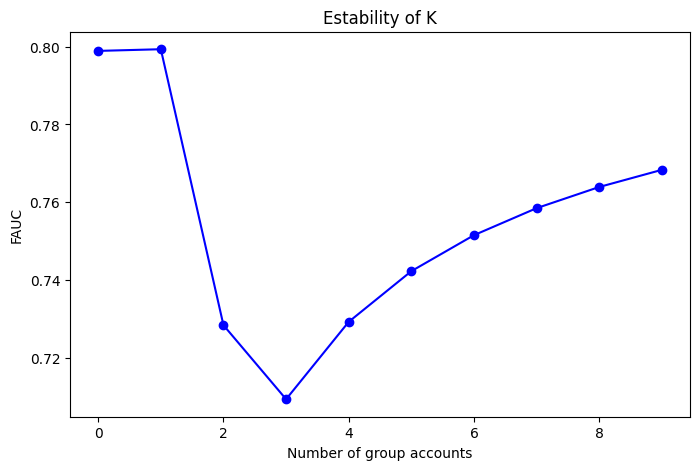

In [26]:
x_values = list(alpha_results.keys())
y_values = list(alpha_results.values())
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, marker='o', color='b', linestyle='-')
plt.title("Estability of K")
plt.xlabel("Number of group accounts")
plt.ylabel("FAUC")
plt.grid(False)
plt.show()